# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Start the call counter 
count = 1

In [5]:

print(f"Start Data Requests")
print(f"-------------------------------")


#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} | {city_record}")
        print(f"{url}&q={city}")
         
        count= count + 1
        
        # delay to loop to prevent going over limit in API on openweather
        time.sleep(1.01)
        
    except:
        print("City not found. Next City")
    continue
    



Start Data Requests
-------------------------------
Processing Record 1 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=albany
Processing Record 2 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=puerto ayora
City not found. Next City
Processing Record 3 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=port-gentil
Processing Record 4 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=mataura
Processing Record 5 | Shubarshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=shubarshi
Processing Record 6 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=hasaki
Processing Record 7 | Bonthe
http://api.openweathermap.org

City not found. Next City
Processing Record 57 | Bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=bakchar
Processing Record 58 | Dromolaxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=dromolaxia
Processing Record 59 | Mīrābād
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=mirabad
Processing Record 60 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=cidreira
Processing Record 61 | Korostyshiv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=korostyshiv
Processing Record 62 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=bambous virieux
Processing Record 63 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 114 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=carnarvon
Processing Record 115 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=hermanus
Processing Record 116 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=padang
Processing Record 117 | Varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=varhaug
Processing Record 118 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=college
Processing Record 119 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=vao
Processing Record 120 | Bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=bulgan
Proce

Processing Record 169 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=kavieng
Processing Record 170 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=iqaluit
Processing Record 171 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=tuktoyaktuk
Processing Record 172 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=leningradskiy
City not found. Next City
Processing Record 173 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=kieta
Processing Record 174 | Qandala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=qandala
Processing Record 175 | Roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 225 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=tiksi
Processing Record 226 | Atasū
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=atasu
Processing Record 227 | Novaya Ladoga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=novaya ladoga
Processing Record 228 | Myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=myitkyina
Processing Record 229 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=dunedin
City not found. Next City
Processing Record 230 | Kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=kiama
Processing Record 231 | Savinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc6139066

Processing Record 281 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=petropavlovsk-kamchatskiy
Processing Record 282 | Krasnoshchekovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=krasnoshchekovo
Processing Record 283 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=karratha
Processing Record 284 | San Rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=san rafael
Processing Record 285 | Jammalamadugu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=jammalamadugu
Processing Record 286 | Nizza Monferrato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=nizza monferrato
Processing Record 287 | Bilibino
http://api.openweat

Processing Record 337 | Pahrump
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=pahrump
Processing Record 338 | San Mateo del Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=san mateo del mar
Processing Record 339 | ‘Ewa Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=ewa beach
Processing Record 340 | Oyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=oyama
Processing Record 341 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=chifeng
Processing Record 342 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=bathsheba
Processing Record 343 | Tecolutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb

Processing Record 392 | Waoundé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=waounde
Processing Record 393 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=baykit
Processing Record 394 | Dukat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=dukat
Processing Record 395 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=sinnamary
Processing Record 396 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=marawi
Processing Record 397 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=port hardy
Processing Record 398 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=la

Processing Record 447 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=kloulklubed
Processing Record 448 | Kuybyshevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=kuybyshevo
Processing Record 449 | Numan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=numan
Processing Record 450 | Guangming
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=taonan
Processing Record 451 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=ancud
Processing Record 452 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=acapulco
Processing Record 453 | Linping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f

Processing Record 504 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=pangnirtung
Processing Record 505 | Venustiano Carranza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=venustiano carranza
Processing Record 506 | Bridgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=bridgetown
Processing Record 507 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=fairbanks
Processing Record 508 | Mtwara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=mtwara
Processing Record 509 | Oxbow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=oxbow
Processing Record 510 | Mgandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61

Processing Record 561 | Esmeraldas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=esmeraldas
Processing Record 562 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=cabedelo
Processing Record 563 | Zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972fc61390662fb514b260f35743e730&q=zhuhai


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
summary_dict = {
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
summary_data = pd.DataFrame(summary_dict)
summary_data.count()
summary_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Albany,90,US,1585014867,86,33.01,42.60,-73.97,9.17
1,Puerto Ayora,93,EC,1585014868,82,79.00,-0.74,-90.35,7.00
2,Port-Gentil,100,GA,1585014869,82,80.96,-0.72,8.78,9.57
3,Mataura,100,NZ,1585014870,91,51.01,-46.19,168.86,11.01
4,Shubarshi,43,KZ,1585014871,72,33.08,48.59,57.19,13.76


In [23]:
cities_list = zip(city_name,cloudiness,country,date,humidity,temp,lat,lng)

# Set variable for output file
output_file = os.path.join('../cities.csv')

#  Open the output file
with open(output_file, 'w') as datafile:
    summary_data.to_csv(output_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

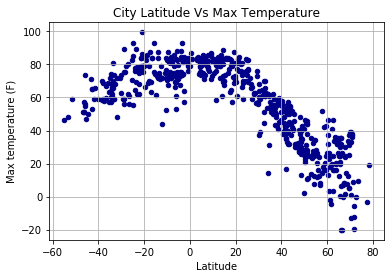

In [24]:
summary_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature' )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Graphs/LatitudeVsTemperature.png")
plt.show()

This code is mapping the highest temperature against its latitude.  This analysis shows there are higher temperatures at lower latitudes.

#### Latitude vs. Humidity Plot

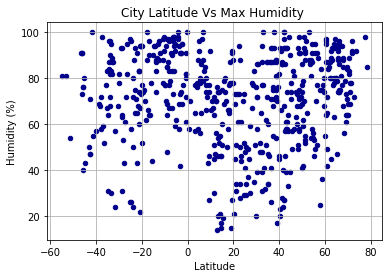

In [25]:

summary_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ' )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Graphs/LatitudeVsHumidity.png")
plt.show()

This scatter plot represents the relationship between humidity and latitude of each city.  As we can see, there does not seem to be a strong relationship here.

#### Latitude vs. Cloudiness Plot

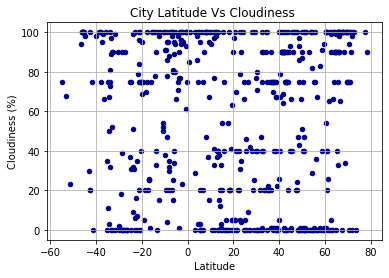

In [26]:
# Latitude Vs Cloudiness

summary_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Graphs/LatitudeVsCloudiness.png")
plt.show()

This analyzes the cloudiness of each city versus its latitude.  There does not appear to be a strong relationship between these two variables.

#### Latitude vs. Wind Speed Plot

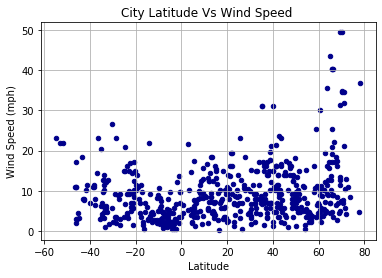

In [27]:
summary_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ' )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Graphs/LatitudeVsWindSpeed.png")
plt.show()

This code looks at the wind speed in each city versus its latitude.  Once again, there does not seem to be much of a relationship amongst these two factors

## Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi = summary_data.loc[summary_data['Lat'] >= 0.0]
northern_hemi.reset_index(inplace=True)

southern_hemi = summary_data.loc[summary_data['Lat'] < 0.0]
southern_hemi.reset_index(inplace=True)

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotregression(x_data, y_data, x_label, y_label, label_positions, reg_rig):
    (slope, intercept, r, p, stderr) = linregress(x_data, y_data)
    print(f'r-squared is {r}')
    regress_values = x_data*slope + intercept
    slope_equation = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept, 2))
          
    plt.scatter(x_data,y_data)
    plt.title(title)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(slope_equation,label_positions,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"Graphs/fig{reg_rig}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared is -0.897176943457341


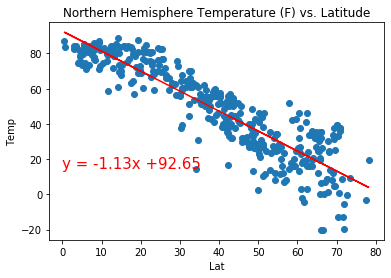

In [30]:
x_label = 'Lat'
y_label = 'Temp'
title = 'Northern Hemisphere Temperature (F) vs. Latitude'
label_positions = (0,15)

plotregression(northern_hemi[x_label],northern_hemi[y_label],x_label,y_label,label_positions,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared is 0.5578577401782426


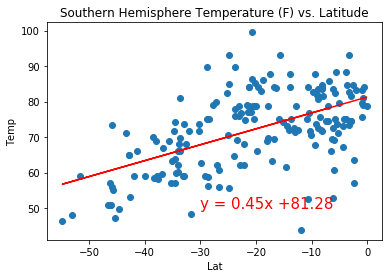

In [31]:
x_label = 'Lat'
y_label = 'Temp'
title = 'Southern Hemisphere Temperature (F) vs. Latitude'
label_positions = (-30,50)

plotregression(southern_hemi[x_label],southern_hemi[y_label],x_label,y_label,label_positions,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared is 0.2874388734080512


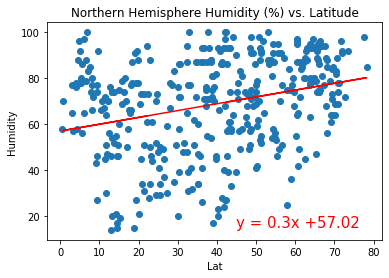

In [32]:
x_label = 'Lat'
y_label = 'Humidity'
title = 'Northern Hemisphere Humidity (%) vs. Latitude'
label_positions = (45,15)

plotregression(northern_hemi[x_label],northern_hemi[y_label],x_label,y_label,label_positions,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared is 0.29064671508869966


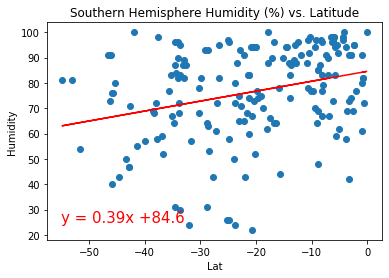

In [33]:
x_label = 'Lat'
y_label = 'Humidity'
title = 'Southern Hemisphere Humidity (%) vs. Latitude'
label_positions = (-55, 25)

plotregression(southern_hemi[x_label],southern_hemi[y_label],x_label,y_label,label_positions,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared is 0.16913390211199641


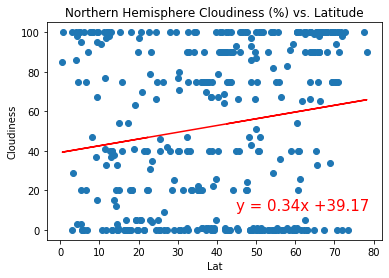

In [34]:
x_label = 'Lat'
y_label = 'Cloudiness'
title = 'Northern Hemisphere Cloudiness (%) vs. Latitude'
label_positions = (45,10)

plotregression(northern_hemi[x_label],northern_hemi[y_label],x_label,y_label,label_positions,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared is 0.10829446365128145


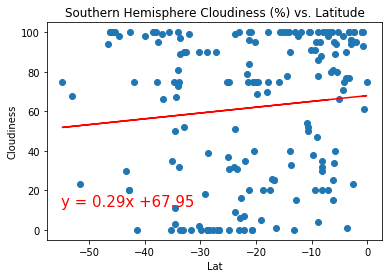

In [35]:
x_label = 'Lat'
y_label = 'Cloudiness'
title = 'Southern Hemisphere Cloudiness (%) vs. Latitude'
label_positions = (-55,12)

plotregression(southern_hemi[x_label],southern_hemi[y_label],x_label,y_label,label_positions,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared is 0.2516533445778394


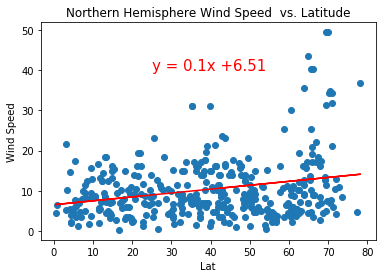

In [36]:
x_label = 'Lat'
y_label = 'Wind Speed'
title = 'Northern Hemisphere Wind Speed  vs. Latitude'
label_positions = (25,40)

plotregression(northern_hemi[x_label],northern_hemi[y_label],x_label,y_label,label_positions, 11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared is -0.4357073463810826


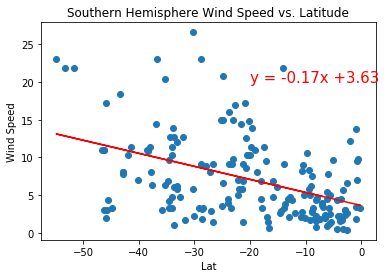

In [37]:
x_label = 'Lat'
y_label = 'Wind Speed'
title = 'Southern Hemisphere Wind Speed vs. Latitude'
label_positions = (-20,20)

plotregression(southern_hemi[x_label],southern_hemi[y_label],x_label,y_label,label_positions,12)

### Observations

1. Temperature is highly inversly correlated with latitude.  The closer to the equator (lower the latitude) the higher the temperature.I belive this occurs due to sunlight contacting the earth and a higher angle (closer to 90 degrees) at the equator   (latitude = 0) than higher latitudes

2. There doesnt seem to be a strong relationship between humidity and latitude.  
    I think this is due to both air currents and ocean currents.  If there were no currents, i would expect humidity to be the highest at lower latitudes.  Since there are various air and sea currents, this can drastically alter humidity in locations all over the globe.  Currents can push humidity into areas that otherwise would not have any.

3. There doesnt seem to be any relationship between cloudiness and latitude.
    This is a result of air currents and/or local winds.  Wind and air currents can move the clouds all around the globe.  